# Report 黑色星期五销售情况分析

### 项目背景

- 美国圣诞节大采购一般是从感恩节之后开始的，11月的第四个星期五是美国人大采购的第一天。
- 在这一天，美国的商场都会推出大量的打折和优惠活动，以在年底进行最后一次大规模的促销。
- 因为美国的商场一般以红色记录赤字，以黑色记录盈利，而感恩节后的这个星期五，人们疯狂地抢购使得商场利润大增，因此被商家们称作黑色星期五。
- 本次数据分析所用的数据集是零售商店中黑色星期五的交易样本数据，商店希望更加了解用户购买行为。所以本文通过总结本次“黑五”销售状况，分析和研究不同用户对不同产品的购买行为来为下一次“黑五”提供相关情报和参考，给出有用的建议。

### 目的

本项目主要解答以下问题：
- 本次黑色星期五该零售商店整体销售状况统计；
- 不同商品在本次黑色星期五中的销售表现，畅销的产品、畅销产品分类是什么？
- 用户画像分析，探究用户基本特征（包括性别、年龄、婚姻状况、职业等）与销售的关系；
- 城市业绩分析，不同城市用户画像有何差别？

### 数据准备

此处的数据集是从Kaggle网站上获取的CSV数据，是零售商店中进行的交易的样本。

In [1]:
#加载库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
sns.set_style({'font.sans-serif':['simhei','Arial']})

In [2]:
#加载csv数据
df = pd.read_csv('BlackFriday.csv')
#初步观察数据情况
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [3]:
#数据类型转换 将Purchase列由int转换成float
df['Purchase'] = df['Purchase'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 49.2+ MB


In [4]:
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


该数据集里记录了零售店在黑色星期五的交易记录样本，数据集中共有12个字段，包含537577条数据，5891个不同user_id,3623个不同product_id,,7个年龄段，21种职业，3个城市，18种商品分类的不同维度数据。其中产品分类2、产品分类3两个字段数据存在缺失，无法填补，故不作为此次分析内容。

In [6]:
#去除产品分类2、产品分类3
df1= df.drop(['Product_Category_2','Product_Category_3'],axis=1)

In [7]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969.0


### 1.整体销售状况统计
- 销售总金额
- 客单价
- 件单价

In [8]:
#销售总金额
df1.Purchase.sum()

5017668378.0

In [9]:
#客单价 = 销售总金额/用户数
arpu = df1.Purchase.sum()/df1.User_ID.nunique()
arpu

851751.5494822611

In [10]:
#件单价 = 销售总金额/订单数
arpp = df1.Purchase.sum()/df1.Product_ID.count()
arpp

9333.859852635065

本次黑色星期五共有5891个用户购买了537577件产品，销售总金额50.18亿美元，客单价85.18万美元，件单价9334美元。

### 2.不同产品销售表现
- 产品销售金额分布图
- 畅销商品
- 畅销分类

1）产品销售金额分布图

In [11]:
grouped_products = df1.groupby('Product_ID').agg({'User_ID':'count','Purchase':'sum'})
grouped_products.rename(columns={'User_ID':'Amount'}, inplace = True)
grouped_products.describe()

,Amount,Purchase
count,3623.000000,3.623000e+03
mean,148.378968,1.384948e+06
std,208.176730,2.608237e+06
min,1.000000,4.050000e+02
25%,19.000000,1.143055e+05
50%,70.000000,4.352640e+05
75%,192.000000,1.503716e+06
max,1858.000000,2.753243e+07


本次黑色星期五最畅销的产品售出了1858件，而售出最少的仅1件，中位数为70，售出均值为148，说明大多数产品销售并不理想。<br>
产品销售均值为138.5万美元，中位数为43万美元，各产品的销售金额呈右偏分布，主要集中在0-150万元以下，其中销售额最多的产品累计售出2753万元。

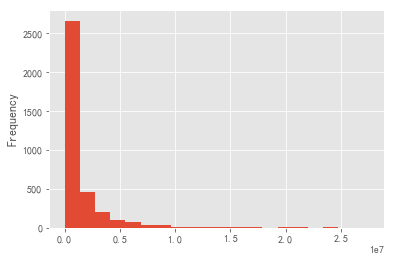

In [12]:
grouped_products['Purchase'].plot.hist(bins=20)
plt.show()

2）畅销商品分析

In [13]:
#销售数量排名前50的产品
rank_of_amount = grouped_products.sort_values(by = 'Amount',ascending=False)
rank_of_amount[:50]

,Amount,Purchase
Product_ID,,
P00265242,1858,13983325.0
P00110742,1591,26382569.0
P00025442,1586,27532426.0
P00112142,1539,23882624.0
P00057642,1430,22493690.0
P00184942,1424,24060871.0
P00046742,1417,20869698.0
P00058042,1396,12029707.0
P00145042,1384,20089014.0


In [14]:
#销售额排名前50的产品
rank_of_purchase = grouped_products.sort_values(by = 'Purchase',ascending=False)
rank_of_purchase[:50]

,Amount,Purchase
Product_ID,,
P00025442,1586,27532426.0
P00110742,1591,26382569.0
P00255842,1354,24652442.0
P00184942,1424,24060871.0
P00059442,1384,23948299.0
P00112142,1539,23882624.0
P00110942,1336,23232538.0
P00237542,1374,23096487.0
P00057642,1430,22493690.0


3）畅销产品分类分析

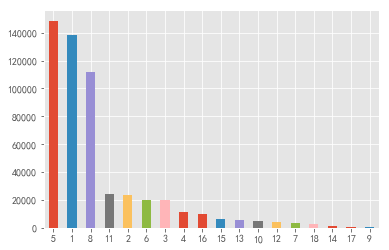

In [15]:
#各产品分类销售数量统计
df1['Product_Category_1'].value_counts().plot.bar()
plt.xticks(rotation = 0)
plt.show()

本次黑色星期五用户主要购买了编号5、1、8类产品，这三类产品销量占到了总销量的75%

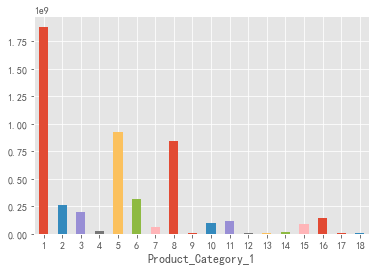

In [16]:
#各产品分类销售额统计
df1.groupby('Product_Category_1')['Purchase'].sum().plot.bar()
plt.xticks(rotation = 0)
plt.show()

产品分类销售额最多的同样也是编号1、5、8类产品，这三类产品销售额占到了总销售的75%左右

### 3.用户画像分析
- 用户总体消费情况
- 性别占比
- 年龄特征
- 婚姻状况
- 职业分布

1）用户总体消费情况

In [17]:
grouped_user = df1.groupby('User_ID')['Purchase'].sum()
grouped_user.describe()

count    5.891000e+03
mean     8.517515e+05
std      9.329978e+05
min      4.410800e+04
25%      2.349140e+05
50%      5.126120e+05
75%      1.099005e+06
max      1.053678e+07
Name: Purchase, dtype: float64

本次黑色星期五5891个用户，平均消费85万美元，而中位数为51万美元，说明大多数用户消费金额在100万元以下，有少部分顾客在本次血拼中付出昂贵的代价，购买最多的用户购买了总计1053.7万美元的商品。

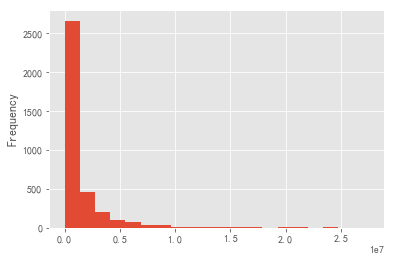

In [18]:
grouped_products['Purchase'].plot.hist(bins=20)
plt.show()

2）性别占比

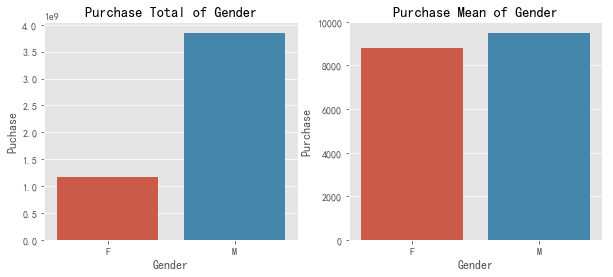

In [19]:
#按照性别分组，计算男女用户消费总金额和人均消费
grouped_gender_sum = df1.groupby('Gender')['Purchase'].sum()
grouped_gender_mean = df1.groupby('Gender')['Purchase'].mean()
plt.figure(1,figsize =(10,4))

plt.subplot(121)
sns.barplot(x=grouped_gender_sum.index,y=grouped_gender_sum.values)
plt.title('Purchase Total of Gender')
plt.ylabel('Puchase')

plt.subplot(122)
sns.barplot(x=grouped_gender_mean.index,y=grouped_gender_mean.values)
plt.title('Purchase Mean of Gender')
plt.ylabel('Purchase')

plt.show()

从上图中可以看出，对于消费总金额而言，男性是消费主力，是女性消费的3倍左右。但从人均消费来看，则不相伯仲，也可以推断出本次黑色星期五是由男性拉动消费，男性用户占到绝对优势（下面可以证实该推断，男性用户占比71.7%）。

In [20]:
#为了便于统计用户特征数量，将User_ID唯一
df2 = df1.drop_duplicates('User_ID')

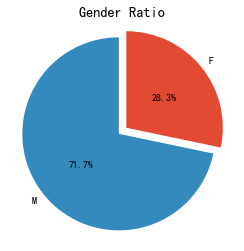

In [21]:
#购买用户性别构成
grouped_gender_count = df2.groupby('Gender')['User_ID'].count()
plt.figure(1,figsize=(4,4))
plt.title('Gender Ratio')
explode=(0.1,0)
plt.pie(grouped_gender_count,labels=grouped_gender_count.index,autopct='%1.1f%%',textprops = {'fontsize':10,'color':'k'},
        explode=explode,startangle=90,pctdistance = 0.5,counterclock = False)
plt.axis('equal')
plt.show()

3）年龄特征

In [22]:
##按照年龄分组，计算各年龄段用户数
grouped_age_count = df2.groupby('Age')['User_ID'].count()
grouped_age_count

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64

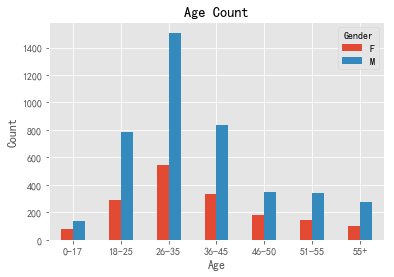

In [23]:
#按照年龄和性别分组，计算各年龄段内的用户数及性别构成
df2.groupby(['Gender','Age'])['User_ID'].count().unstack(level = 'Gender').plot.bar()
plt.title('Age Count')
plt.xticks(rotation = 0)
plt.ylabel('Count')
plt.show()

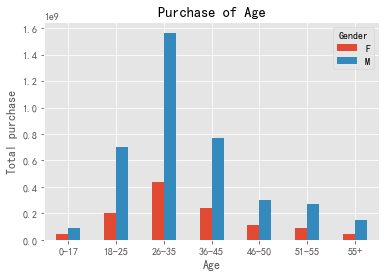

In [24]:
#按照年龄和性别分组，计算各年龄段内消费金额
df1.groupby(['Gender','Age'])['Purchase'].sum().unstack(level = 'Gender').plot(kind = 'bar')
plt.title('Purchase of Age')
plt.xticks(rotation = 0)
plt.ylabel('Total purchase')
plt.show()

上图可见，本次活动用户年龄主要集中在18-45岁之间，其中26-35用户数量占到35%左右，消费金额占总销售额的40%，可见这个年龄段是本次活动的主力军。而不管在哪个年龄阶段，男性用户数、消费金额都要比女性多。

4）婚姻状况

Text(0, 0.5, 'Purchase')

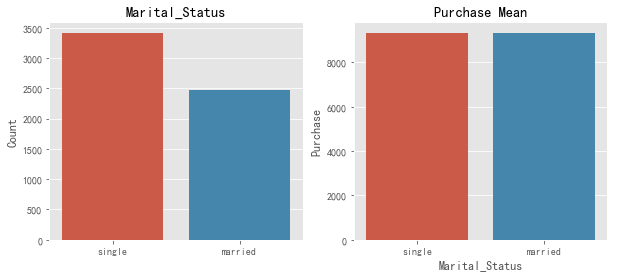

In [25]:
#按照婚姻状况分组，计算已婚未婚用户数及人均消费金额
grouped_mar_count = df2.groupby('Marital_Status')['User_ID'].count()
grouped_mar_mean = df1.groupby('Marital_Status')['Purchase'].mean()
plt.figure(1,figsize =(10,4))
plt.subplot(121)
plt.title('Marital_Status')
index_ls = ['single','married']
plt.ylabel('Count')
sns.barplot(x=index_ls,y=grouped_mar_count.values)
plt.subplot(122)
sns.barplot(x=grouped_mar_mean.index,y=grouped_mar_mean.values)
index_ls = ['single','married']
plt.xticks(grouped_mar_mean.index,index_ls)
plt.title('Purchase Mean')
plt.ylabel('Purchase')


未婚用户在本次活动中占比大于已婚，但是未婚和已婚在人均消费情况下基本一致，可见婚姻状态对消费金额影响不是很大。

5）职业分布

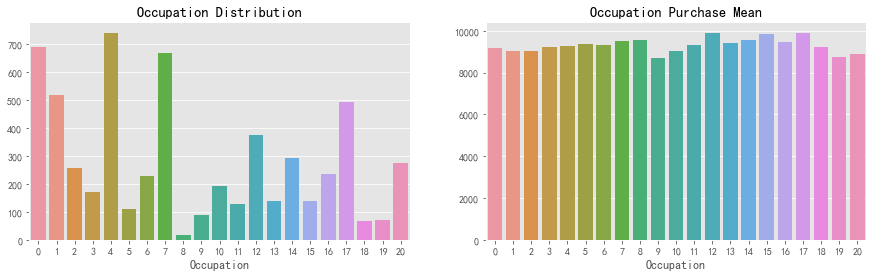

In [26]:
#按照职业分组，计算各职业用户数及人均消费金额
grouped_occ_count = df2.groupby('Occupation')['User_ID'].count()
grouped_occ_mean = df1.groupby('Occupation')['Purchase'].mean()

plt.figure(1,figsize =(15,4))
plt.subplot(121)
plt.title('Occupation Distribution')
sns.barplot(x=grouped_occ_count.index,y=grouped_occ_count.values)

plt.subplot(122)
plt.title('Occupation Purchase Mean')
sns.barplot(x=grouped_occ_mean.index,y=grouped_occ_mean.values)
plt.show()

可以看出，编号0，4，7这三个职业用户人数是最多的，但从平均购买金额上看，编号12，17，15是消费能力最强的三个职业。

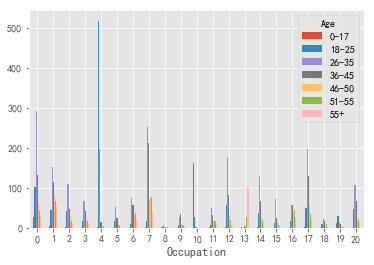

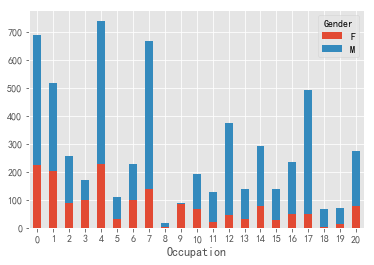

In [27]:
#不同职业年龄段分布
df2.groupby(['Occupation','Age'])['User_ID'].count().unstack(level = 'Age').plot(kind = 'bar')
plt.xticks(rotation = 0)
#不同职业性别比例
df2.groupby(['Occupation','Gender'])['User_ID'].count().unstack(level = 'Gender').plot.bar(stacked=True)
plt.xticks(rotation = 0)
plt.show()

只有职业编号9，女性用户数是碾压男性，其余均没有大的变化，可以猜测该职业的性别构成，并做重点营销等。

### 4.城市业绩分析
- 城市销售情况分析
- 各级城市用户画像对比

1）城市销售情况分析

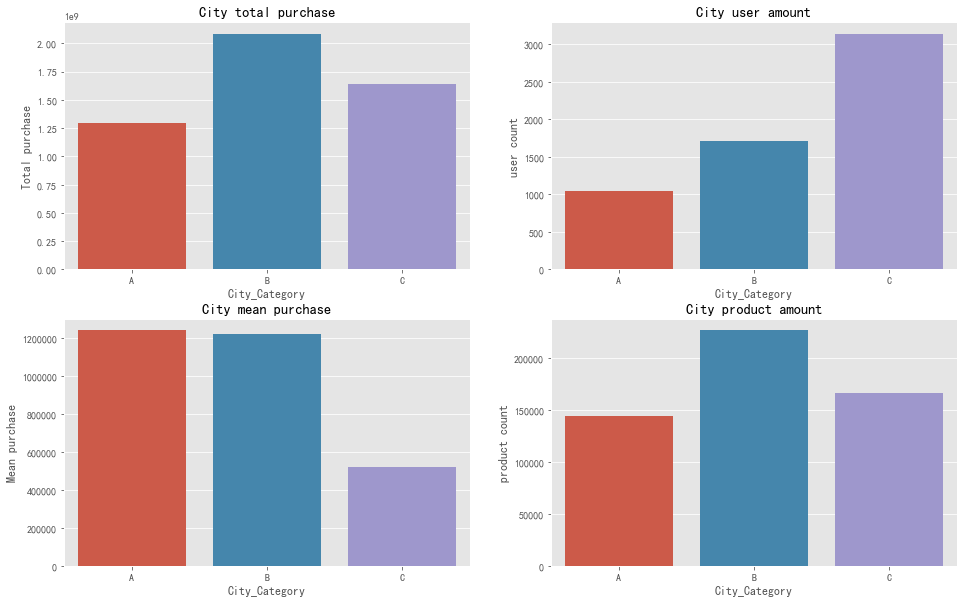

In [28]:
#按照城市级别分组，计算各级别城市的销售总金额、用户数、用户平均购买金额、产品销售数量
grouped_city_pruchase_sum = df1.groupby('City_Category')['Purchase'].sum()
grouped_city_user_count = df2. groupby('City_Category')['User_ID'].count()
grouped_city_pruchase_mean = grouped_city_pruchase_sum/grouped_city_user_count
grouped_city_product_count = df1.groupby('City_Category')['Product_ID'].count()
#绘制柱形图
plt.figure(1,figsize=(16,10))
plt.subplot(221)
plt.title('City total purchase')
plt.xticks(rotation = 0)
plt.ylabel("Total purchase")
sns.barplot(x=grouped_city_pruchase_sum.index,y=grouped_city_pruchase_sum.values)

plt.subplot(222)
plt.title('City user amount')
plt.xticks(rotation = 0)
plt.ylabel("user count")
sns.barplot(x=grouped_city_user_count.index,y=grouped_city_user_count.values)

plt.subplot(223)
plt.title('City mean purchase')
plt.xticks(rotation = 0)
plt.ylabel("Mean purchase")
sns.barplot(x=grouped_city_pruchase_mean.index,y=grouped_city_pruchase_mean.values)

plt.subplot(224)
plt.title('City product amount')
plt.xticks(rotation = 0)
plt.ylabel("product count")
sns.barplot(x=grouped_city_product_count.index,y=grouped_city_product_count.values)

plt.show()

可以看出B级城市凭借着不到30%的用户数贡献了最多的销售额，购买的产品数量最多，说明B级城市的购买力强，用户需求旺盛。
A级城市购买力最强，比B级城市略高，但用户数较少，属于高端消费者，可以挖掘A级城市的用户。
而C级城市虽然占据了一半以上的用户数，但购买力较弱，平均消费较低，购买猜测C级城市人均收入不高。C级城市用户购买的产品数量占三分之一左右，也从 侧面印证了该级城市的用户购买的基本属于单价较低的产品。可以选择大型促销刺激购买。

2）各级城市用户画像对比

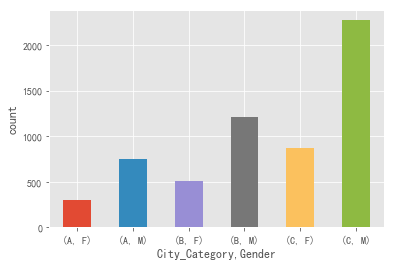

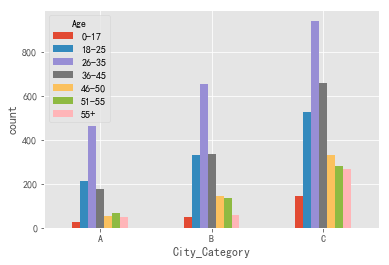

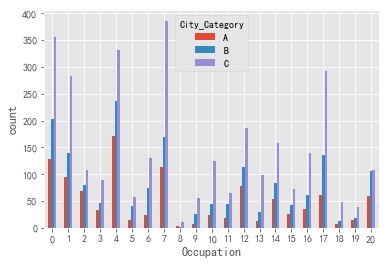

In [29]:
#各级城市用户性别、年龄、职业分布
df2.groupby(['City_Category','Gender'])['User_ID'].count().plot.bar()
plt.xticks(rotation = 0)
plt.ylabel("count")
df2.groupby(['City_Category','Age'])['User_ID'].count().unstack(level = 'Age').plot.bar()
plt.xticks(rotation = 0)
plt.ylabel("count")
df2.groupby(['Occupation','City_Category'])['User_ID'].count().unstack(level = 'City_Category').plot.bar()
plt.xticks(rotation = 0)
plt.ylabel("count")
plt.show()

从上面三幅图来看，各级城市的性别分布、年龄分布、职业分布没有太大变化。用户均是男性占主力；年龄以26-35岁占优，主要集中在18-45岁之间；职业编号4，0，7用户人数最多，唯一的区别是c级城市职业编号为7的用户数最多。

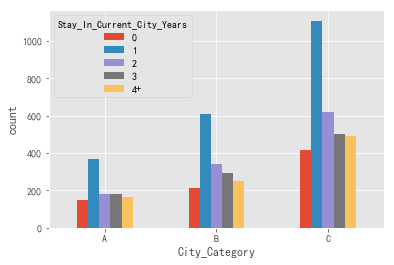

In [30]:
#各级城市不同居住年限用户分布
df2.groupby(['City_Category','Stay_In_Current_City_Years'])['User_ID'].count().unstack(level = 'Stay_In_Current_City_Years').plot.bar()
plt.xticks(rotation = 0)
plt.ylabel("count")
plt.show()


各城市用户的居住年限呈现相同分布，居住年限为1的用户为主力用户，居住年限为0的用户最少。

### 总结

1、在本次黑色星期五的促销活动中，购买用户数共计5891人，总销售额为50.17亿美元，客单价为85.18美元，件单价为9333.86美元。<br>
2、本次黑色星期五最畅销产品是“P00265242”，最畅销类目1依次是5、1、8。建议根据畅销产品、畅销分类调整产品结构。<br>
3、就用户的性别、年龄段、职业、居住年限与消费额的关系而言，本次黑色星期五的消费群体主要是男性，年龄段在26岁到35岁之间，高消费群体的职业主要集中在4、0、7这三个职业编号上，居住年限为1年。<br>
4、就城市级别而言，B级城市用户是本次黑色星期五的主力军。城市A、B高端消费者比较多，人群消费能力强。城市C属于大众市场，客单价不高，可以将目标定在提高销量上。各城市级别用户画像与总体相差不大。<br>